In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 

from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing

from scipy import interp
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.svm import SVC  
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.utils import shuffle
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
from numpy import set_printoptions
from pycm import *

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error
set_printoptions(precision=3)
pd.set_option('display.max_rows', 1000)
data=pd.read_csv('KEYSTROKES.csv')

#data.keys()
data.head()
array = data.values

X=data.drop(labels='subject',axis=1)
X.fillna(X.mean())
y=data['subject']
X, y = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train.shape, X_test.shape , y_train.shape,y_test.shape

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
################################################################################################################
################################################################################################################
def run_RF(X_train, X_test, y_train, y_test):
    start =  time.process_time()
    clf = RandomForestClassifier(max_depth=30, n_estimators=200)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('RF____Accuracy: ', accuracy_score(y_test, y_pred),"---TIME = %s seconds ---" % ((time.process_time() - start)/20))
# Model Accuracy, how often is the classifier correct?
    print ("TEST Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print( "TEST F1 score:",metrics.f1_score(y_test, y_pred, average='macro'))
    print("TEST Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
    print ("TEST  Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
    cm = confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm.diagonal())
    PRED_V = y_pred
    ACT_V=y_test.values
    cm1 = ConfusionMatrix(actual_vector=ACT_V, predict_vector=PRED_V) # Create CM From Data
    cm1.classes
    cm1.table
    cm1.save_html(os.path.join("RFIMP_RF_results"))
################################################################################################################
################################################################################################################
def run_DT(X_train, X_test, y_train, y_test):
    start =time.process_time()
    clf = DecisionTreeClassifier(random_state=50)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('DT____Accuracy: ', accuracy_score(y_test, y_pred),"---TIME = %s seconds ---" % (time.process_time() - start))
# Model Accuracy, how often is the classifier correct?
    print ("TEST Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print( "TEST F1 score:",metrics.f1_score(y_test, y_pred, average='macro'))
    print("TEST Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
    print ("TEST  Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
    cm = confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm.diagonal())
    PRED_V = y_pred
    ACT_V=y_test.values
    cm1 = ConfusionMatrix(actual_vector=ACT_V, predict_vector=PRED_V) # Create CM From Data
    cm1.classes
    cm1.table
    cm1.save_html(os.path.join("RFIMP_DT_results"))
################################################################################################################
################################################################################################################
def run_NB(X_train, X_test, y_train, y_test):
    start =  time.process_time()
    clf = GaussianNB(var_smoothing=0.0001519911082952933)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred = clf.predict(X_test)
    print('NB____Accuracy: ', accuracy_score(y_test, y_pred),"---TIME = %s seconds ---" % (time.process_time() - start))
# Model Accuracy, how often is the classifier correct?
    print ("TEST Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print( "TEST F1 score:",metrics.f1_score(y_test, y_pred, average='macro'))
    print("TEST Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
    print ("TEST  Precision:", metrics.precision_score(y_test, y_pred, average='macro'))

    cm = confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm.diagonal())
    PRED_V = y_pred
    ACT_V=y_test.values
    cm1 = ConfusionMatrix(actual_vector=ACT_V, predict_vector=PRED_V) # Create CM From Data
    cm1.classes
    cm1.table
    cm1.save_html(os.path.join("RFIMP_NB_results"))
################################################################################################################
################################################################################################################
def run_XGB(X_train, X_test, y_train, y_test):
    start = time.process_time()
    clf = SVC(C=10, gamma=1, kernel='linear') # Linear Kernel
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('XGB____Accuracy: ', accuracy_score(y_test, y_pred),"---TIME = %s seconds ---" % (time.process_time() - start))
# Model Accuracy, how often is the classifier correct?
    print ("TEST Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print( "TEST F1 score:",metrics.f1_score(y_test, y_pred, average='macro'))
    print("TEST Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
    print ("TEST  Precision:", metrics.precision_score(y_test, y_pred, average='macro'))

    cm = confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm.diagonal())
    PRED_V = y_pred
    ACT_V=y_test.values
    cm1 = ConfusionMatrix(actual_vector=ACT_V, predict_vector=PRED_V) # Create CM From Data
    cm1.classes
    cm1.table
    cm1.save_html(os.path.join("RFIMP_XGB_results"))
################################################################################################################
################################################################################################################
def run_KNN(X_train, X_test, y_train, y_test):
    start = time.process_time()
    clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred = clf.predict(X_test)
    print('KNN____Accuracy: ', accuracy_score(y_test, y_pred),"---TIME = %s seconds ---" % (time.process_time() - start))
# Model Accuracy, how often is the classifier correct?
    print ("TEST Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print( "TEST F1 score:",metrics.f1_score(y_test, y_pred, average='macro'))
    print("TEST Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
    print ("TEST  Precision:", metrics.precision_score(y_test, y_pred, average='macro'))

    cm = confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm.diagonal())
    PRED_V = y_pred
    ACT_V=y_test.values
    cm1 = ConfusionMatrix(actual_vector=ACT_V, predict_vector=PRED_V) # Create CM From Data
    cm1.classes
    cm1.table
    cm1.save_html(os.path.join("RFIMP_KNN_results"))
################################################################################################################
################################################################################################################

In [25]:
start = time.process_time()
trainedforest = RandomForestClassifier(max_depth=30, n_estimators=200).fit(X_train,y_train)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))

71.953125
[[84  0  0 ...  0  0  0]
 [ 0 61  0 ...  0  0  0]
 [ 0  0 77 ...  0  0  0]
 ...
 [ 0  0  0 ... 72  0  0]
 [ 0  0  0 ...  0 99  0]
 [ 0  0  0 ...  0  0 79]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00        61
           3       1.00      0.97      0.99        79
           4       1.00      1.00      1.00        81
           5       1.00      1.00      1.00        82
           6       1.00      1.00      1.00        72
           7       1.00      1.00      1.00        71
           8       1.00      1.00      1.00        73
           9       1.00      0.99      1.00       108
          10       1.00      1.00      1.00        68
          11       1.00      1.00      1.00        90
          12       1.00      1.00      1.00        93
          13       1.00      1.00      1.00        82
          14       1.00      1.00      1.00        74
          15       1.00

D15-DD    0.056925
D15-UD    0.044336
D15-UU    0.032890
D6-UD     0.021695
D3-UU     0.021132
D10-DD    0.020755
D3-UD     0.019936
D5-UU     0.019856
D6-DU     0.019833
D2-DD     0.019795
D7-DU     0.019094
D4-UD     0.018818
D4-UU     0.018762
D4-DD     0.018301
D7-UD     0.017986
D3-DU     0.017568
D7-DD     0.017326
D5-DD     0.017198
U11-H     0.016771
D7-UU     0.016298
D1-UD     0.016196
D1-DU     0.015881
D2-DU     0.015637
D6-DD     0.014963
U3-H      0.014714
D3-DD     0.014470
D10-DU    0.014119
D6-UU     0.013785
D4-DU     0.013602
D2-UU     0.012967
U10-H     0.011901
D16-DD    0.011781
U12-H     0.011145
D1-DD     0.011136
D14-UU    0.010841
D5-UD     0.010801
D9-UU     0.010262
D16-UU    0.010180
U2-H      0.010040
D17-UD    0.009799
D12-DU    0.009762
D13-UU    0.009750
U9-H      0.009552
D9-DD     0.009539
U5-H      0.009530
D9-DU     0.009523
D15-DU    0.009364
D17-DD    0.009143
U8-H      0.008651
D17-DU    0.008526
D16-DU    0.008504
D13-DU    0.008246
U1-H      0.

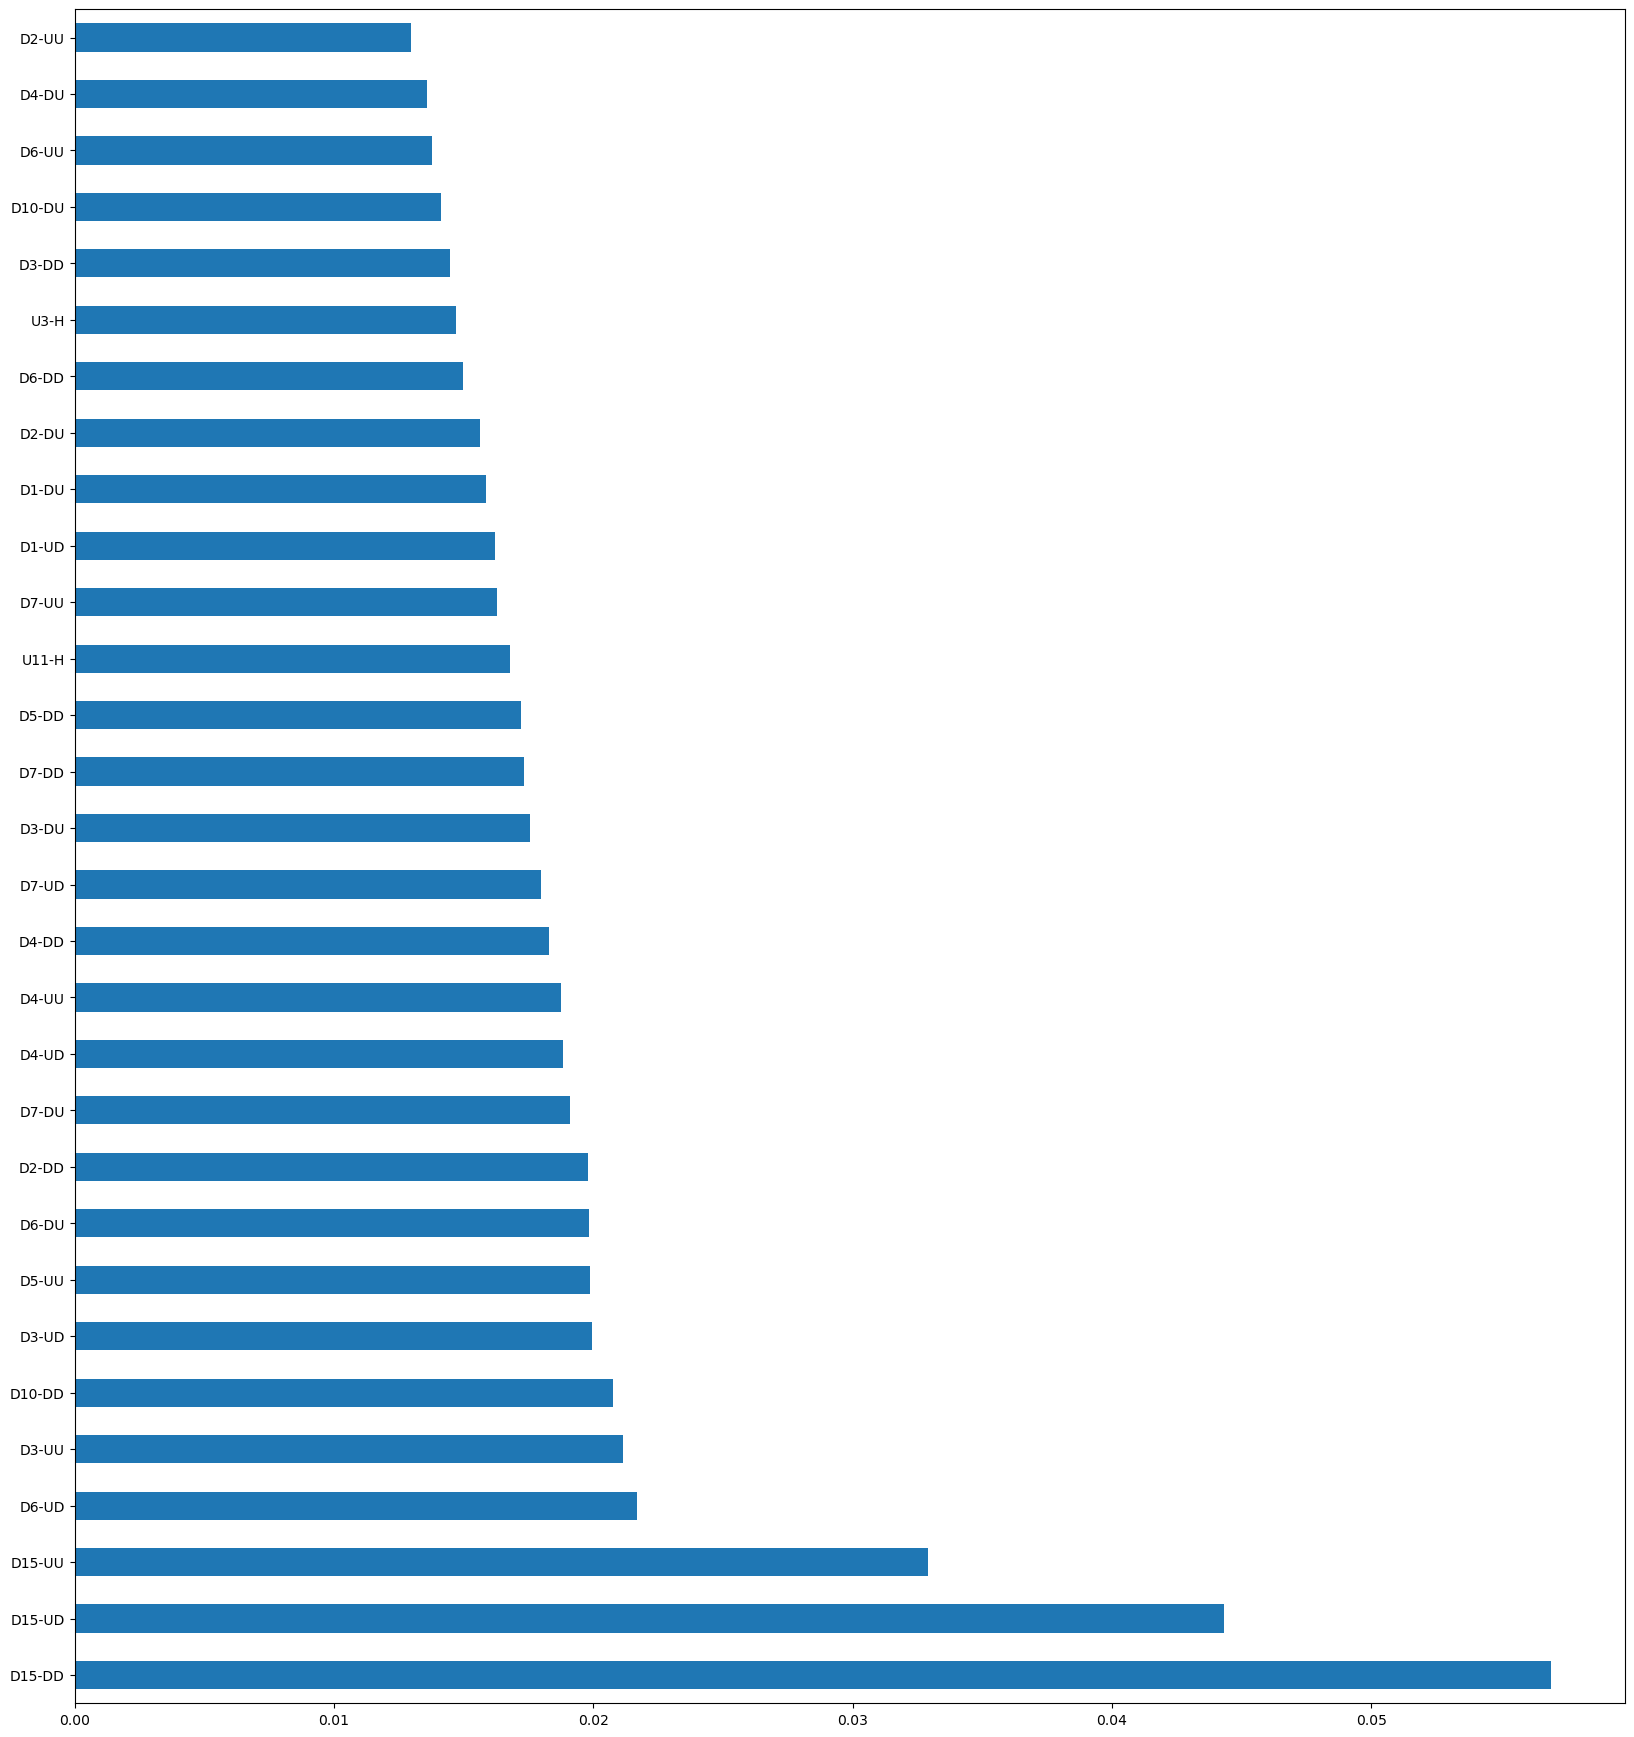

In [26]:
figure(num=None, figsize=(20, 22), dpi=100, facecolor='w', edgecolor='k')

feat_importances = pd.Series(trainedforest.feature_importances_, index= X.columns).sort_values(ascending=False)
feat_importances.nlargest(30).plot(kind='barh')
feat_importances

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


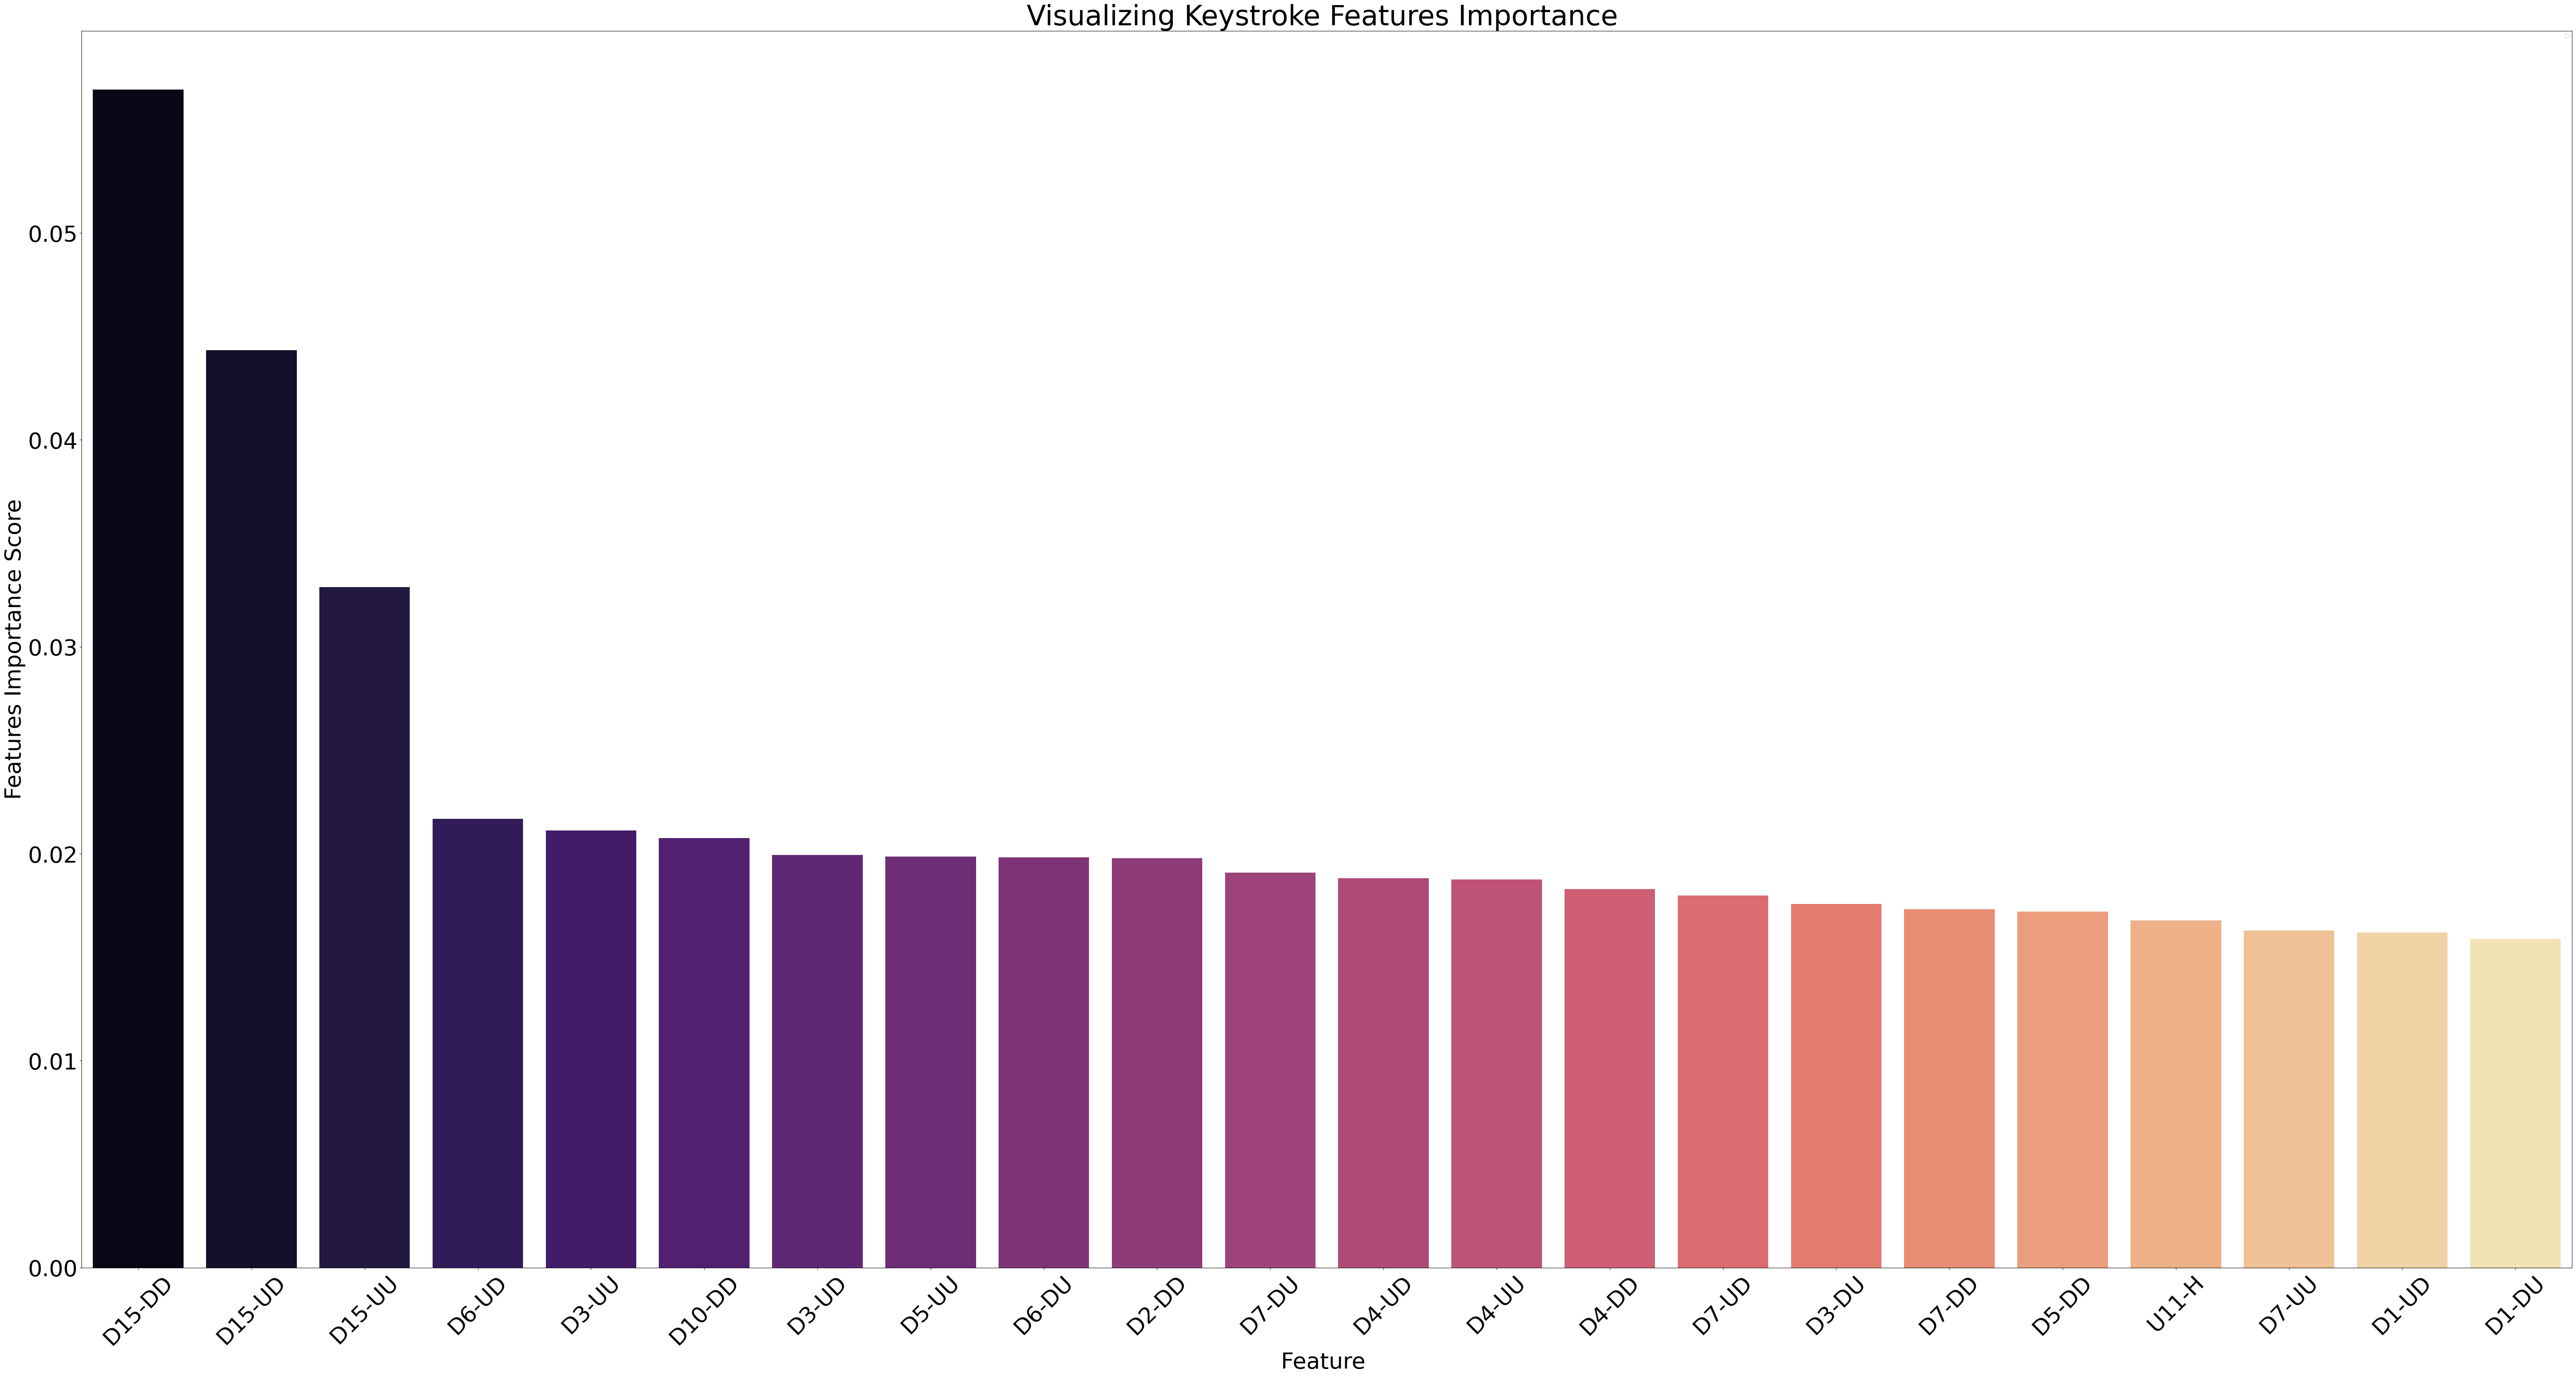

<Figure size 640x480 with 0 Axes>

In [27]:
### import matplotlib.pyplot as plt1
import seaborn as sns
import matplotlib.pyplot as plt1
%matplotlib inline
# Creating a bar plot
feat_importances = pd.Series(trainedforest.feature_importances_, index= X.columns).nlargest(22).sort_values(ascending=False)
plt1.figure(figsize=(80,40))
sns.barplot(x=feat_importances.index, y=feat_importances,palette='magma')
# Add labels to your graph
plt1.xlabel('Feature ',fontsize=40)
plt1.ylabel('Features Importance Score',fontsize=40)
plt1.title("Visualizing Keystroke Features Importance ",fontsize=50)
plt1.legend()
plt1.xticks(rotation=45,fontsize=40)
plt1.yticks(fontsize=40)
plt1.show()
plt1.savefig('KS_FEATURE_IMPORTANCE.png',bbox_inches='tight')

In [28]:
X_Reduced = X[["D15-DD","D15-UD", "D15-UU","D6-UD","D3-UU","D10-DD","D3-UD","D5-UU","D2-DD","D6-DU",
               "D4-UD","D7-DD","D4-UU","D7-UD","D7-DU","D4-DD","D5-DD","D7-UU","D1-DU","D3-DU","U11-H","D2-DU","D6-DD","D1-UD","D10-DU","D3-DD","U3-H","D4-DU","D6-UU","D5-UD"]]
#,"tanangle","areamean","pstd","areaquarts_0","minx","areaquarts_2","pquarts_1"
X_Reduced = StandardScaler().fit_transform(X_Reduced)
X_Train2, X_Test2, Y_Train2, Y_Test2 = train_test_split(X_Reduced, y, test_size = 0.20, 
                                                        random_state = 101)

In [29]:
run_RF(X_Train2, X_Test2, Y_Train2, Y_Test2)
print()

RF____Accuracy:  0.9928571428571429 ---TIME = 2.1109375 seconds ---
TEST Accuracy: 0.9928571428571429
TEST F1 score: 0.9929958468632446
TEST Recall: 0.9931491289004357
TEST  Precision: 0.9929792098859954
[0.977 0.98  0.975 1.    1.    1.    1.    0.933 1.    1.    1.    1.
 1.    0.989 1.    0.987 1.    1.    0.985 1.    1.    1.    0.988 0.987
 1.    1.    0.988 0.974 1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    0.988 1.    1.    0.976 0.987 1.    1.    0.966 1.    0.978
 0.986 1.    0.985 1.    1.    1.    0.988 1.   ]



In [30]:
run_XGB(X_Train2, X_Test2, Y_Train2, Y_Test2)
print()

XGB____Accuracy:  0.9680803571428571 ---TIME = 4.984375 seconds ---
TEST Accuracy: 0.9680803571428571
TEST F1 score: 0.968350656599986
TEST Recall: 0.9684590483116747
TEST  Precision: 0.9686828216504626
[0.953 0.99  0.914 0.959 0.964 0.987 0.987 0.989 0.918 0.973 0.949 0.975
 1.    0.977 1.    0.987 0.989 1.    0.97  1.    1.    0.952 0.976 0.975
 1.    0.964 0.976 0.872 0.985 0.987 0.972 0.9   0.964 0.988 1.    0.95
 0.955 0.988 1.    1.    0.986 0.927 0.987 1.    0.923 0.921 1.    0.944
 0.986 1.    0.971 0.91  0.944 0.984 0.938 0.928]



In [31]:
run_KNN(X_Train2, X_Test2, Y_Train2, Y_Test2)
print()

KNN____Accuracy:  0.9546875 ---TIME = 1.78125 seconds ---
TEST Accuracy: 0.9546875
TEST F1 score: 0.9546784649064026
TEST Recall: 0.9550705593313046
TEST  Precision: 0.9552783298545248
[0.953 0.939 0.852 0.919 0.964 0.974 1.    0.921 0.918 0.867 0.962 0.951
 1.    0.955 0.988 0.962 1.    1.    1.    0.986 1.    0.916 0.871 0.949
 1.    0.964 0.988 0.885 0.985 0.987 0.944 0.887 0.952 0.988 1.    0.975
 0.921 0.963 0.963 0.987 0.986 0.951 0.924 0.965 0.945 0.955 1.    0.978
 0.958 0.987 0.868 0.872 0.972 1.    0.938 0.952]

